# FitzHugh-Nagumo analysis

The FitzHugh-Nagumo model is given by:

$$ \frac {dV} {dt} = V(1 - \frac {V^2} 3) - w + I_{ext} $$

$$ \tau \frac {dw} {dt} = V + a - b w $$

In [1]:
from collections import OrderedDict
import brainpy as bp

bp.backend.set(dt=0.02)

In [2]:
class FitzHughNagumo(bp.NeuGroup):
    target_backend = 'general'

    def __init__(self, size, a=0.7, b=0.8, tau=12.5, Vth=1.9, **kwargs):
        self.a = a
        self.b = b
        self.tau = tau
        self.Vth = Vth

        self.V = bp.backend.zeros(size)
        self.w = bp.backend.zeros(size)
        self.spike = bp.backend.zeros(size)
        self.input = bp.backend.zeros(size)

        super(FitzHughNagumo, self).__init__(size=size, **kwargs)

    @staticmethod
    @bp.odeint(method='rk4')
    def integral(V, w, t, Iext, a, b, tau):
        dw = (V + a - b * w) / tau
        dV = V - V * V * V / 3 - w + Iext
        return dV, dw

    def update(self, _t):
        V, self.w = self.integral(self.V, self.w, _t, self.input, self.a, self.b, self.tau)
        self.spike = (V >= self.Vth) * (self.V < self.Vth)
        self.V = V
        self.input[:] = 0.

## Simulation

Compilation used 0.0000 s.
Start running ...
Run 10.0% used 0.145 s.
Run 20.0% used 0.309 s.
Run 30.0% used 0.465 s.
Run 40.0% used 0.597 s.
Run 50.0% used 0.737 s.
Run 60.0% used 0.881 s.
Run 70.0% used 1.027 s.
Run 80.0% used 1.172 s.
Run 90.0% used 1.322 s.
Run 100.0% used 1.466 s.
Simulation is done in 1.466 s.



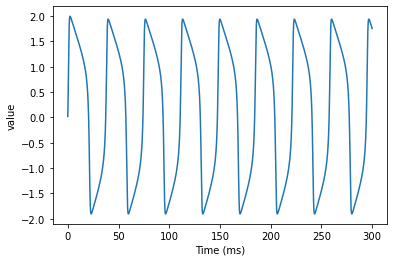

Compilation used 0.0010 s.
Start running ...
Run 10.0% used 0.149 s.
Run 20.0% used 0.303 s.
Run 30.0% used 0.460 s.
Run 40.0% used 0.610 s.
Run 50.0% used 0.758 s.
Run 60.0% used 0.922 s.
Run 70.0% used 1.134 s.
Run 80.0% used 1.310 s.
Run 90.0% used 1.451 s.
Run 100.0% used 1.606 s.
Simulation is done in 1.606 s.



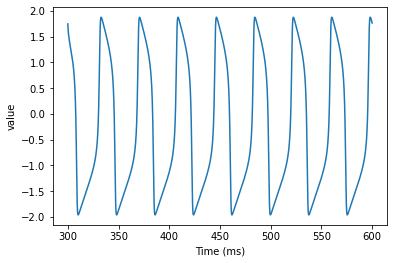

In [3]:
FNs = FitzHughNagumo(2, monitors=['V'])

FNs.run(duration=300., inputs=('input', 1.), report=True)
bp.visualize.line_plot(FNs.mon.ts, FNs.mon.V, show=True)

FNs.run(duration=(300., 600.), inputs=('input', 0.6), report=True)
bp.visualize.line_plot(FNs.mon.ts, FNs.mon.V, show=True)

## Phase plane analysis

plot nullcline ...
SymPy solve "integral(V, w) = 0" to "w = f(V, )", success.
SymPy solve "integral(V, w) = 0" to "w = f(V, )", success.
plot fixed point ...
SymPy solve derivative of "integral(V, w)" by "V", success.
SymPy solve derivative of "integral(V, w)" by "w", success.
SymPy solve derivative of "integral(V, w)" by "V", success.
SymPy solve derivative of "integral(V, w)" by "w", success.
Fixed point #1 at V=0.4088658369434122, w=1.3860822961792651 is a unstable node.
plot limit cycle ...
plot vector field ...


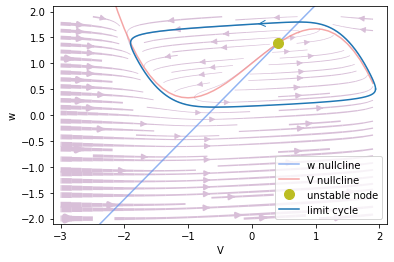

In [4]:
phase = bp.analysis.PhasePlane(FNs.integral,
                               target_vars={'V': [-3, 2], 'w': [-2, 2]},
                               fixed_vars=None,
                               pars_update={'Iext': 1., "a": 0.7, 'b': 0.8, 'tau': 12.5})
phase.plot_nullcline()
phase.plot_fixed_point()
# phase.plot_trajectory(initials={'V': -1, 'w': 1}, duration=100.)
phase.plot_limit_cycle_by_sim(initials={'V': -1, 'w': 1}, duration=100.)
phase.plot_vector_field(show=True)

## Codimension 1 bifurcation analysis

plot bifurcation ...
SymPy solve "integral(V, w, Iext) = 0" to "w = f(V, Iext)", success.
SymPy solve derivative of "integral(V, w, Iext)" by "V", success.
SymPy solve derivative of "integral(V, w, Iext)" by "w", success.
SymPy solve derivative of "integral(V, w, Iext)" by "V", success.
SymPy solve derivative of "integral(V, w, Iext)" by "w", success.


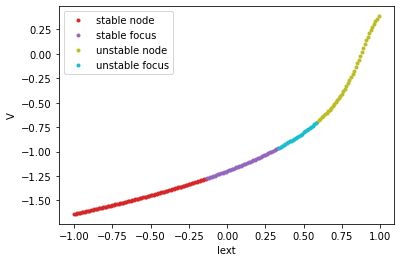

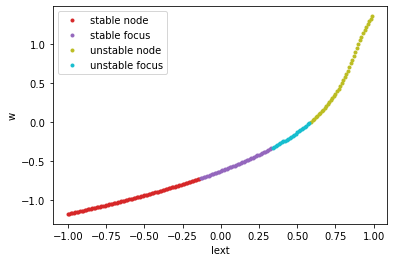

In [5]:
bifurcation = bp.analysis.Bifurcation(FNs.integral,
                                      target_pars={'Iext': [-1, 1]},
                                      target_vars={'V': [-3, 2], 'w': [-2, 2]},
                                      fixed_vars=None,
                                      pars_update={'a': 0.7, 'b': 0.8, 'tau': 12.5},
                                      numerical_resolution=0.01)
bifurcation.plot_bifurcation(show=True)

## Codimension 2 bifurcation analysis

plot bifurcation ...
SymPy solve "integral(V, w, a, Iext) = 0" to "w = f(V, a,Iext)", success.
SymPy solve derivative of "integral(V, w, a, Iext)" by "V", success.
SymPy solve derivative of "integral(V, w, a, Iext)" by "w", success.
SymPy solve derivative of "integral(V, w, a, Iext)" by "V", success.
SymPy solve derivative of "integral(V, w, a, Iext)" by "w", success.


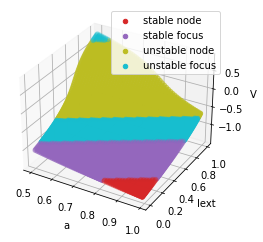

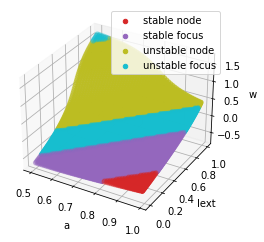

In [6]:
bifurcation = bp.analysis.Bifurcation(FNs.integral,
                                      target_pars=OrderedDict(a=[0.5, 1.], Iext=[0., 1.]),
                                      target_vars=OrderedDict(V=[-3, 3], w=[-3., 3.]),
                                      fixed_vars=None,
                                      pars_update={'b': 0.8, 'tau': 12.5},
                                      numerical_resolution=0.01)
bifurcation.plot_bifurcation(show=True)